In [1]:
import numpy as np
import matplotlib.pyplot as plt
from math import *
import scipy.linalg as sp

In [2]:
def mat(N, T):
    return np.random.normal(0, 1, (N, T))
def eigvals(C):
    return np.linalg.eigvals(C)

In [12]:
def delta(i, j):
    if i==j:
        return 1
    else:
        return 0

def main(nmem, N, T, c): #CWOE
    xval = np.zeros(nmem * N)
    m = 0
    xi = np.zeros((N, N))
    for i in range(N):
        for j in range(N):
            xi[i, j] = delta(i, j) + c * (1 - delta(i, j))
    xi = sp.sqrtm(xi)
    for i in range(nmem):
        B = mat(N, T)
        Bt = np.transpose(B)
        matrix = np.matmul(xi, np.matmul(B, np.matmul(Bt, xi))) / T
        eigval = eigvals(matrix)
        xm = np.mean(eigval)
        xv = np.std(eigval)
        
        for k in range(N):
            xval[m] = eigval[k]
            m = m + 1
    return xval

In [13]:
def MPDist(N, T, c):
    k = T/N
    l = (1-c)*(1/sqrt(k) - 1)**2
    L = (1-c)*(1/sqrt(k) + 1)**2
    X = np.linspace(l, L, 1000)
    Y = []
    for x in X:
        Y.append((k/(2*pi*(1 - c)*x)) * sqrt((L - x) * (x - l)))
    return X, Y

In [14]:
eigs100200c1 = main(200, 100, 200, 0.1)
eigs100200c5 = main(200, 100, 200, 0.5)
eigs100200c9 = main(200, 100, 200, 0.9)

C:\Users\DKmat\AppData\Local\Temp/ipykernel_18060/3382957574.py:24: ComplexWarning: Casting complex values to real discards the imaginary part
  xval[m] = eigval[k]


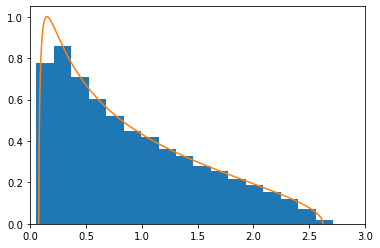

In [25]:
plt.xlim(0, 3)
plt.hist(eigs100200c1, 100, density=True)
plt.plot(MPDist(100, 200, 0.1)[0], MPDist(100, 200, 0.1)[1])

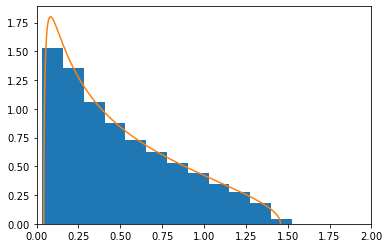

In [26]:
plt.xlim(0, 2)
plt.hist(eigs100200c5, 500, density=True)
plt.plot(MPDist(100, 200, 0.5)[0], MPDist(100, 200, 0.5)[1])

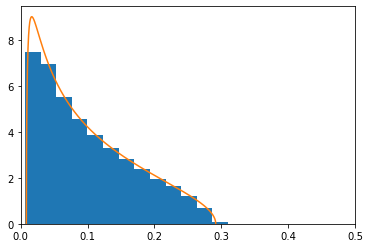

In [27]:
plt.xlim(0, 0.5)
plt.hist(eigs100200c9, 5000, density=True)
plt.plot(MPDist(100, 200, 0.9)[0], MPDist(100, 200, 0.9)[1])

The eigenvalues agree with the modified MP distribution, save for outliers.